In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
data = {
    "id": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110,111,112],
    "nombre": [
        "Ana Torres", "Luis Pérez", "María Gómez", "Pedro Díaz", "Lucía Ramírez",
        "Andrés Rojas", "Sofía Morales", "Carlos Ruiz", "Valentina López", "Jorge Herrera","Ana Torres","Jorge Herrera"
    ],
    "correo": [
        "ana.torres@example.com",
        "luis.perez@example.com",
        "maria.gomez@example.com",
        "pedro.diaz@example.com",
        "lucia.ramirez@example.com",
        "andres.rojas@example.com",
        "sofia.morales@example.com",
        "carlos.ruiz@example.com",
        "valentina.lopez@example.com",
        "jorge.herrera@example.com",
        "ana.torres@example.com",
        "jorge.herrera@example.com"
    ],
    "fecha_registro": [
        "2020-01-15",
        "2019-03-20",
        "2018-07-10",
        "2017-11-01",
        "2021-05-25",
        "2016-09-13",
        "2022-02-05",
        "2015-08-19",
        "2021-12-01",
        "2018-04-30",
        "2020-05-20",        
        "2018-12-17"
    ]
}

df_clientes = pd.DataFrame(data)
display(df_clientes)


,id,nombre,correo,fecha_registro
0,101,Ana Torres,ana.torres@example.com,2020-01-15
1,102,Luis Pérez,luis.perez@example.com,2019-03-20
2,103,María Gómez,maria.gomez@example.com,2018-07-10
3,104,Pedro Díaz,pedro.diaz@example.com,2017-11-01
4,105,Lucía Ramírez,lucia.ramirez@example.com,2021-05-25
5,106,Andrés Rojas,andres.rojas@example.com,2016-09-13
6,107,Sofía Morales,sofia.morales@example.com,2022-02-05
7,108,Carlos Ruiz,carlos.ruiz@example.com,2015-08-19
8,109,Valentina López,valentina.lopez@example.com,2021-12-01
9,110,Jorge Herrera,jorge.herrera@example.com,2018-04-30


In [31]:
#Primero detectar clientes duplicados por correo 
duplicados_correos = df_clientes[df_clientes.duplicated(subset=['correo'],keep=False)]
display(duplicados_correos)

,id,nombre,correo,fecha_registro
0,101,Ana Torres,ana.torres@example.com,2020-01-15
9,110,Jorge Herrera,jorge.herrera@example.com,2018-04-30
10,111,Ana Torres,ana.torres@example.com,2020-05-20
11,112,Jorge Herrera,jorge.herrera@example.com,2018-12-17


In [32]:
#Eliminar los duplicados con la fecha mas reciente del registro
df_sin_duplicados = df_clientes.drop_duplicates(subset=['correo'],keep='first')
display(df_sin_duplicados)

,id,nombre,correo,fecha_registro
0,101,Ana Torres,ana.torres@example.com,2020-01-15
1,102,Luis Pérez,luis.perez@example.com,2019-03-20
2,103,María Gómez,maria.gomez@example.com,2018-07-10
3,104,Pedro Díaz,pedro.diaz@example.com,2017-11-01
4,105,Lucía Ramírez,lucia.ramirez@example.com,2021-05-25
5,106,Andrés Rojas,andres.rojas@example.com,2016-09-13
6,107,Sofía Morales,sofia.morales@example.com,2022-02-05
7,108,Carlos Ruiz,carlos.ruiz@example.com,2015-08-19
8,109,Valentina López,valentina.lopez@example.com,2021-12-01
9,110,Jorge Herrera,jorge.herrera@example.com,2018-04-30


In [33]:
#Mantener el registro con la fecha mas reciente
#Ordeno primero por fecha de registro y luego los elimino
# Si quieres quedarte con el registro más reciente, ordena en orden descendente
# ascending=False → ahora el primero será el más reciente.
# keep='first' → mantiene ese más reciente y elimina los duplicados más antiguos.

df_sin_duplicados_recent = df_clientes.sort_values('fecha_registro',ascending=False).drop_duplicates(subset=['correo'],keep='first')
display(df_sin_duplicados_recent)

,id,nombre,correo,fecha_registro
6,107,Sofía Morales,sofia.morales@example.com,2022-02-05
8,109,Valentina López,valentina.lopez@example.com,2021-12-01
4,105,Lucía Ramírez,lucia.ramirez@example.com,2021-05-25
10,111,Ana Torres,ana.torres@example.com,2020-05-20
1,102,Luis Pérez,luis.perez@example.com,2019-03-20
11,112,Jorge Herrera,jorge.herrera@example.com,2018-12-17
2,103,María Gómez,maria.gomez@example.com,2018-07-10
3,104,Pedro Díaz,pedro.diaz@example.com,2017-11-01
5,106,Andrés Rojas,andres.rojas@example.com,2016-09-13
7,108,Carlos Ruiz,carlos.ruiz@example.com,2015-08-19


In [34]:
#Detectar datos atipicos
import numpy as np
import pandas as pd

np.random.seed(42)  # para reproducibilidad

# Simular 30 ventas con montos normalmente distribuidos alrededor de 500 ± 100
monto_normal = np.random.normal(loc=500, scale=100, size=30).astype(int)

# Insertar algunos valores atípicos (muy altos y muy bajos)
monto_outliers = np.append(monto_normal, [50, 80, 2000, 3000])
# arr es un array de NumPy.
# arr.tolist() lo convierte en una lista de Python ([10, 20, 30]).

ventas = {
    "id_venta": list(range(1, len(monto_outliers) + 1)),
    "producto": np.random.choice(
        ["Laptop", "Celular", "Tablet", "Audífonos", "Monitor"], 
        size=len(monto_outliers)
    ).tolist(),
    "cantidad": np.random.randint(1, 5, size=len(monto_outliers)).tolist(),
    "monto_venta": monto_outliers.tolist(),
    "fecha_venta": pd.date_range("2023-01-01", periods=len(monto_outliers)).strftime("%Y-%m-%d").tolist()
}

df = pd.DataFrame(ventas)
display(df)

,id_venta,producto,cantidad,monto_venta,fecha_venta
0,1,Audífonos,3,549,2023-01-01
1,2,Audífonos,1,486,2023-01-02
2,3,Audífonos,1,564,2023-01-03
3,4,Audífonos,1,652,2023-01-04
4,5,Monitor,3,476,2023-01-05
5,6,Tablet,1,476,2023-01-06
6,7,Laptop,4,657,2023-01-07
7,8,Audífonos,1,576,2023-01-08
8,9,Celular,4,453,2023-01-09
9,10,Audífonos,4,554,2023-01-10


In [35]:
#Detectar los outlierts detectar valores atipicos
Q1 = df['monto_venta'].quantile(0.25)
Q3 = df['monto_venta'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

outliers = df[(df['monto_venta'] < lower_bound) | (df['monto_venta'] > upper_bound)]
display(outliers)

,id_venta,producto,cantidad,monto_venta,fecha_venta
3,4,Audífonos,1,652,2023-01-04
6,7,Laptop,4,657,2023-01-07
20,21,Audífonos,1,646,2023-01-21
30,31,Audífonos,2,50,2023-01-31
31,32,Monitor,1,80,2023-02-01
32,33,Laptop,4,2000,2023-02-02
33,34,Monitor,3,3000,2023-02-03


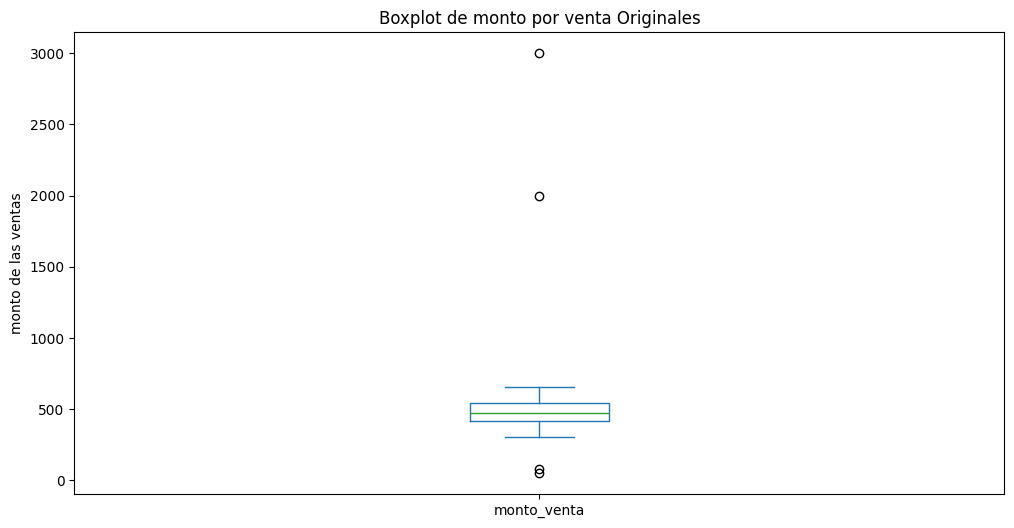

In [36]:
#Reemplazar los outliers con la mediana de los datos
#Previsualizacion inicial 
plt.figure(figsize=(12,6))
df['monto_venta'].plot(kind='box')
plt.title('Boxplot de monto por venta Originales')
plt.ylabel('monto de las ventas')
plt.show()

In [43]:
#Estrategia para imputar datos atipicos se aplica una funcion para que las ventas dondes esta aitpico quede con la media de los datos
df['monto_imputado'] = df['monto_venta'].apply(
    lambda x : df['monto_venta'].median() if x < lower_bound or x > upper_bound else x)
display(df)

,id_venta,producto,cantidad,monto_venta,fecha_venta,monto_imputado
0,1,Audífonos,3,549,2023-01-01,549.0
1,2,Audífonos,1,486,2023-01-02,486.0
2,3,Audífonos,1,564,2023-01-03,564.0
3,4,Audífonos,1,652,2023-01-04,476.0
4,5,Monitor,3,476,2023-01-05,476.0
5,6,Tablet,1,476,2023-01-06,476.0
6,7,Laptop,4,657,2023-01-07,476.0
7,8,Audífonos,1,576,2023-01-08,576.0
8,9,Celular,4,453,2023-01-09,453.0
9,10,Audífonos,4,554,2023-01-10,554.0


In [39]:
#Otra forma pero utilizando la libreria de numpy
# (df['monto_venta'] < lower_bound) | (df['monto_venta'] > upper_bound) → condición booleana que detecta outliers.
# mediana → valor que se asigna cuando la condición es True (es decir, cuando el dato es un outlier).
# df['monto_venta'] → valor que se mantiene cuando la condición es False (cuando no es un outlier).
import numpy as np

# Calculamos la mediana una sola vez
media = df['monto_venta'].median()

# Usamos np.where para imputar los outliers
df['monto_imputado'] = np.where(
    (df['monto_venta'] < lower_bound) | (df['monto_venta'] > upper_bound), 
    media, 
    df['monto_venta']
)

display(df)

,id_venta,producto,cantidad,monto_venta,fecha_venta,monto_imputado
0,1,Audífonos,3,549,2023-01-01,549.0
1,2,Audífonos,1,486,2023-01-02,486.0
2,3,Audífonos,1,564,2023-01-03,564.0
3,4,Audífonos,1,652,2023-01-04,476.0
4,5,Monitor,3,476,2023-01-05,476.0
5,6,Tablet,1,476,2023-01-06,476.0
6,7,Laptop,4,657,2023-01-07,476.0
7,8,Audífonos,1,576,2023-01-08,576.0
8,9,Celular,4,453,2023-01-09,453.0
9,10,Audífonos,4,554,2023-01-10,554.0


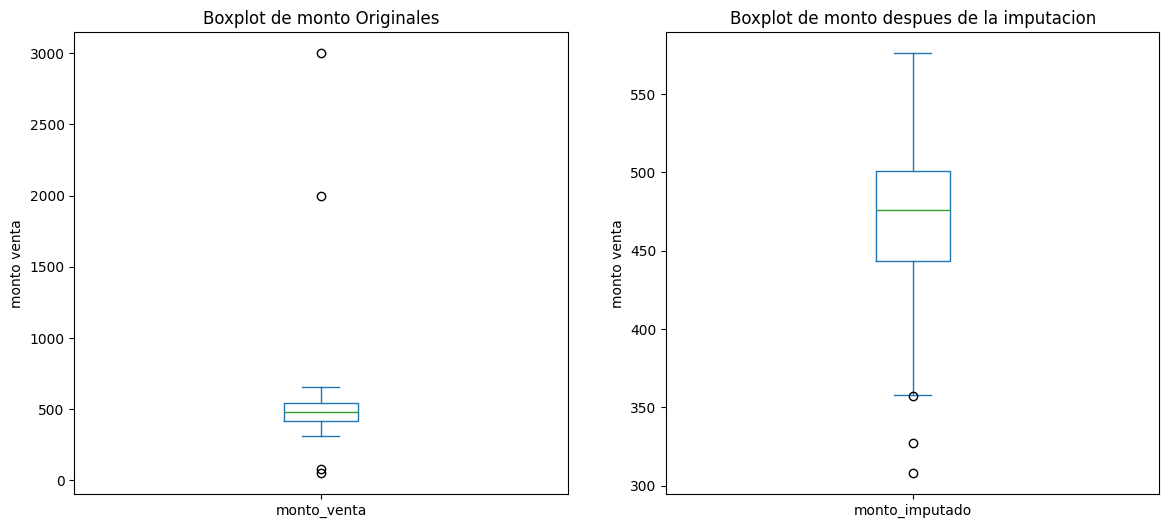

In [44]:
#visualizacion del antes y despues de hacer la imputacion de los datos
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df['monto_venta'].plot(kind='box')
plt.title('Boxplot de monto Originales')
plt.ylabel('monto venta')
plt.subplot(1,2,2)
df['monto_imputado'].plot(kind='box')
plt.title('Boxplot de monto despues de la imputacion')
plt.ylabel('monto venta')
plt.show()

In [45]:
#Se puede hacer una transformacion logaritmica
#Version lambda
df['monto_log'] = df['monto_venta'].apply(lambda x : np.log(x) if x > 0 else 0)
display(df[['id_venta','monto_venta','monto_imputado','monto_log']])

,id_venta,monto_venta,monto_imputado,monto_log
0,1,549,549.0,6.308098
1,2,486,486.0,6.186209
2,3,564,564.0,6.335054
3,4,652,476.0,6.480045
4,5,476,476.0,6.165418
5,6,476,476.0,6.165418
6,7,657,476.0,6.487684
7,8,576,576.0,6.356108
8,9,453,453.0,6.115892
9,10,554,554.0,6.317165


In [46]:
#version vectorizada con numpy
df['monto_log'] = np.where(df['monto_venta'] > 0, np.log(df['monto_venta']), 0)
display(df[['id_venta','monto_venta','monto_imputado','monto_log']])

,id_venta,monto_venta,monto_imputado,monto_log
0,1,549,549.0,6.308098
1,2,486,486.0,6.186209
2,3,564,564.0,6.335054
3,4,652,476.0,6.480045
4,5,476,476.0,6.165418
5,6,476,476.0,6.165418
6,7,657,476.0,6.487684
7,8,576,576.0,6.356108
8,9,453,453.0,6.115892
9,10,554,554.0,6.317165


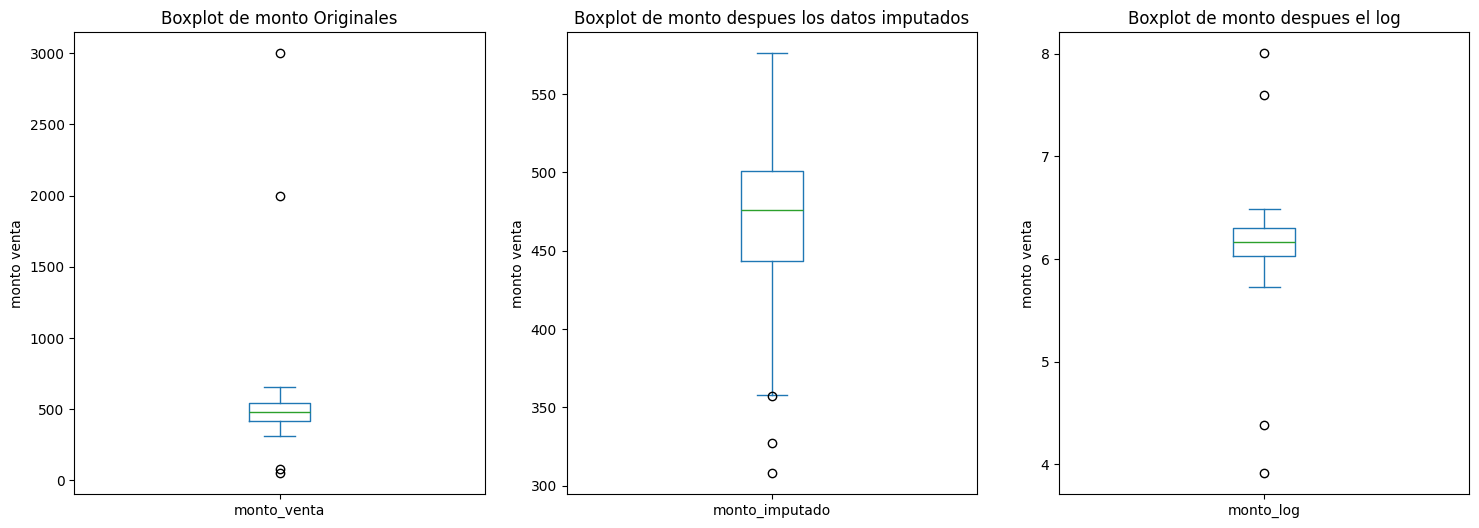

In [47]:
#visualizacion del antes y despues de hacer el log 
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
df['monto_venta'].plot(kind='box')
plt.title('Boxplot de monto Originales')
plt.ylabel('monto venta')

plt.subplot(1,3,2)
df['monto_imputado'].plot(kind='box')
plt.title('Boxplot de monto despues los datos imputados')
plt.ylabel('monto venta')

plt.subplot(1,3,3)
df['monto_log'].plot(kind='box')
plt.title('Boxplot de monto despues el log')
plt.ylabel('monto venta')
plt.show()

In [55]:
nuevos_clientes = {
    "id": [113, 114, 115, 116, 117],
    "nombre": ["Carlos Pérez", "Ana Torres", "Luis Perez", "María Fernanda", "Jorge Ramírez"],
    "correo": ["carlos.perez@mail.com", "ana.torres@example.com", "luis.perez@example.com", 
               "maria.fernanda@mail.com", "jorge.ramirez@mail.com"],
    "fecha_registro": ["2025-08-01", "2025-08-03", "2025-08-05", "2025-08-07", "2025-08-09"]
}

df_nuevos_clientes = pd.DataFrame(nuevos_clientes)
display(df_nuevos_clientes)

,id,nombre,correo,fecha_registro
0,113,Carlos Pérez,carlos.perez@mail.com,2025-08-01
1,114,Ana Torres,ana.torres@example.com,2025-08-03
2,115,Luis Perez,luis.perez@example.com,2025-08-05
3,116,María Fernanda,maria.fernanda@mail.com,2025-08-07
4,117,Jorge Ramírez,jorge.ramirez@mail.com,2025-08-09


In [56]:
#Funcionar los dos dataframe pero si encuentra duplicados los elimine
df_clientes_actualizados = pd.concat([df_clientes, df_nuevos_clientes]).drop_duplicates(subset='correo',keep='last')
display(df_clientes_actualizados)

,id,nombre,correo,fecha_registro
2,103,María Gómez,maria.gomez@example.com,2018-07-10
3,104,Pedro Díaz,pedro.diaz@example.com,2017-11-01
4,105,Lucía Ramírez,lucia.ramirez@example.com,2021-05-25
5,106,Andrés Rojas,andres.rojas@example.com,2016-09-13
6,107,Sofía Morales,sofia.morales@example.com,2022-02-05
7,108,Carlos Ruiz,carlos.ruiz@example.com,2015-08-19
8,109,Valentina López,valentina.lopez@example.com,2021-12-01
11,112,Jorge Herrera,jorge.herrera@example.com,2018-12-17
0,113,Carlos Pérez,carlos.perez@mail.com,2025-08-01
1,114,Ana Torres,ana.torres@example.com,2025-08-03
